In [4]:
#Import necessary packages
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import matplotlib.hatch
from matplotlib.patches import Polygon
import geopandas as gpd
from shapely.geometry import Point
from matplotlib_scalebar.scalebar import ScaleBar


# Integer Cut Analysis Maps (50% SAF Blend)


In [5]:
#Import data from the integer cut analysis where the fraction of SAF producing mills in each solution is preorganized
case1 = pd.read_excel('integer_cut_organized_data.xlsx', sheet_name='Case 1 50%')
case3 = pd.read_excel('integer_cut_organized_data.xlsx', sheet_name='Case 3 50%')

#Import map data
mill_data = pd.read_excel('335MillsLatitudesLongitudes.xlsx') #mills lat and lon
ref_data = pd.read_excel('OilRefineriesLatLong.xlsx') #refineries lat and lon
shapefile_path = "ne_50m_admin_0_countries.shp"
brazil_states = gpd.read_file("gadm41_BRA_1.shp")

# Set CRS to WGS84 (EPSG:4326) for implimenting the scale bar
if brazil_states.crs is None:
    brazil_states = brazil_states.set_crs(epsg=4326)

brazil_states = brazil_states.to_crs(epsg=5880)

#Create Dictionaries With Location Data
#Sort locations of saf mills
saf1 = []
saf3 = []

for i in range(len(case1['SAF Mill'])):
    for j in range(len(mill_data['Mills'])):
        if case1['SAF Mill'][i] == mill_data['Mills'][j]:
            saf1.append((case1['SAF Mill'][i],mill_data['Longitude'][j], mill_data['Latitude'][j], case1['Percentage '][i]))

for i in range(len(case3['SAF Mill'])):
    for j in range(len(mill_data['Mills'])):
        if case3['SAF Mill'][i] == mill_data['Mills'][j]:
            saf3.append((case3['SAF Mill'][i],mill_data['Longitude'][j], mill_data['Latitude'][j], case3['Percentage '][i]))


#Create Pandas DataFrame
case1points= gpd.GeoDataFrame(
    saf1,
    columns=["City", "Longitude", "Latitude", "Percent"],
    geometry=[Point(xy[1], xy[2]) for xy in saf1],
    crs="EPSG:4326"  # WGS84
)

case3points= gpd.GeoDataFrame(
    saf3,
    columns=["City", "Longitude", "Latitude", "Percent"],
    geometry=[Point(xy[1], xy[2]) for xy in saf3],
    crs="EPSG:4326"  # WGS84
)

#Convert to WGS84 (EPSG:4326) for implimenting the scale bar
case1points = case1points.to_crs(brazil_states.crs)
case3points = case3points.to_crs(brazil_states.crs)


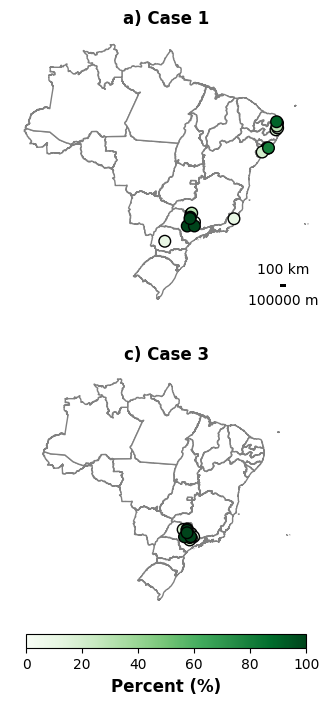

In [6]:
# Plot Brazil states
fig, ax = plt.subplots(2,1,figsize=(10, 8))
fig.subplots_adjust(hspace=0.2)
fig.subplots_adjust(wspace=0)

brazil_states.plot(ax=ax[0], color = 'white', edgecolor='gray')
brazil_states.plot(ax=ax[1], color = 'white', edgecolor='gray')

# Plot points
case1points.plot(
    ax=ax[0],
    column="Percent",      # color points by this column
    markersize=70,  # size of points by volume
    cmap="Greens",
    alpha=1,
    edgecolor="k",
    legend=False,           # shows color scale
    vmin=0,
    vmax=100
)

case3points.plot(
    ax=ax[1],
    column="Percent",      # color points by this column
    markersize=70,  # size of points by volume
    cmap="Greens",
    alpha=1,
    edgecolor="k",
    legend=False,           # shows color scale
    vmin=0,
    vmax=100
)

scalebar = ScaleBar(
    dx=1,                # distance per unit in your CRS (meters if projected)
    units="m",           # your CRS is projected in meters
    dimension="si-length",
    fixed_value=100000,  # 100 km in meters
    label="100 km",
    location="lower right"
)
ax[0].add_artist(scalebar)

# Labels and title
ax[0].set_title("a) Case 1", fontweight = 'bold')
ax[0].axis('off')

ax[1].set_title("c) Case 3", fontweight = 'bold')
ax[1].axis('off')

# Create a scalar mappable for the shared colorbar

import matplotlib as mpl
cmap = mpl.cm.Greens
norm = mpl.colors.Normalize(vmin=0, vmax=100)
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []  # compatibility with older matplotlib

# Add horizontal colorbar spanning all subplots
cbar = fig.colorbar(
    sm, 
    ax=ax[1],                  # apply to all axes
    orientation="horizontal",
    fraction=0.05,          # thickness
    pad=0.08,                # distance from plots
    shrink = 0.8
)
cbar.set_label("Percent (%)", fontweight="bold", fontsize=12)


plt.savefig('Results_Figures/integercutlocations.png',bbox_inches='tight', dpi=500)
plt.show()

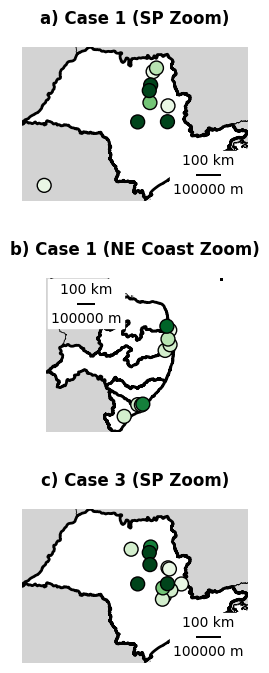

In [7]:
#Zoom in on locations with high numbers of SAF investments

#Name Sao Paulo as a state to zoom on 
sp = brazil_states[brazil_states['NAME_1'] == 'SÃ£o Paulo']

#Set bounds to state bounds
minx, miny, maxx, maxy = sp.total_bounds

fig, ax = plt.subplots(3,1,figsize=(8,8))
fig.subplots_adjust(hspace=0.5)

# Plot all states in light gray for context
brazil_states.plot(ax=ax[0], facecolor='lightgray', edgecolor='black', linewidth=0.5)

# Highlight São Paulo
sp.plot(ax=ax[0], facecolor='white', edgecolor='black', linewidth=2)

# Plot points
case1points.plot(
    ax=ax[0],
    column="Percent",      # color points by this column
    markersize=100,  # size of points by volume
    cmap="Greens",
    alpha=1,
    edgecolor="k",
    legend=False,           # shows color scale
    vmin=0,
    vmax=100
)

scalebar = ScaleBar(
    dx=1,                # distance per unit in your CRS (meters if projected)
    units="m",           # your CRS is projected in meters
    dimension="si-length",
    fixed_value=100000,  # 100 km in meters
    label="100 km",
    location="lower right"
)
ax[0].add_artist(scalebar)

# Zoom to São Paulo bounds
ax[0].set_xlim(minx, maxx)
ax[0].set_ylim(miny, maxy)

ax[0].axis('off')

# Plot all states in light gray for context
brazil_states.plot(ax=ax[2], facecolor='lightgray', edgecolor='black', linewidth=0.5)

# Highlight São Paulo
sp.plot(ax=ax[2], facecolor='white', edgecolor='black', linewidth=2)

# Plot points
case3points.plot(
    ax=ax[2],
    column="Percent",      # color points by this column
    markersize=100,  # size of points by volume
    cmap="Greens",
    alpha=1,
    edgecolor="k",
    legend=False,           # shows color scale
    vmin=0,
    vmax=100
)

# Zoom to São Paulo bounds
ax[2].set_xlim(minx, maxx)
ax[2].set_ylim(miny, maxy)

ax[2].axis('off')

scalebar = ScaleBar(
    dx=1,                # distance per unit in your CRS (meters if projected)
    units="m",           # your CRS is projected in meters
    dimension="si-length",
    fixed_value=100000,  # 100 km in meters
    label="100 km",
    location="lower right"
)
ax[2].add_artist(scalebar)

ax[0].set_title("a) Case 1 (SP Zoom)", fontweight = 'bold')
ax[2].set_title("c) Case 3 (SP Zoom)", fontweight = 'bold')

# List of states you want to zoom in on
states_to_plot = ['Rio Grande do Norte', 'ParaÃ­ba', 'Pernambuco', 'Alagoas', 'Sergipe']

# Filter GeoDataFrame
subset_states = brazil_states[brazil_states['NAME_1'].isin(states_to_plot)]

combined_geom = subset_states.unary_union
minx, miny, maxx, maxy = subset_states.total_bounds

# Plot all states in light gray for context
brazil_states.plot(ax=ax[1], facecolor='lightgray', edgecolor='black', linewidth=0.5)

# Highlight the three states
subset_states.plot(ax=ax[1], facecolor='white', edgecolor='black', linewidth=2)

# Filter points inside the combined states
case1points.plot(
    ax=ax[1],
    column="Percent",      # color points by this column
    markersize=100,  # size of points by volume
    cmap="Greens",
    alpha=1,
    edgecolor="k",
    legend=False,           # shows color scale
    vmin=0,
    vmax=100
)

# Zoom to the bounds of the three states
ax[1].set_xlim(minx, maxx)
ax[1].set_ylim(miny, maxy)

scalebar = ScaleBar(
    dx=1,                # distance per unit in your CRS (meters if projected)
    units="m",           # your CRS is projected in meters
    dimension="si-length",
    fixed_value=100000,  # 100 km in meters
    label="100 km",
    location="upper left"
)
ax[1].add_artist(scalebar)

ax[1].axis('off')

ax[1].set_title("b) Case 1 (NE Coast Zoom)", fontweight = 'bold')

plt.savefig('Results_Figures/integercutlocationszoom.png',bbox_inches='tight', dpi=500)
plt.show()
